1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Read csv file

In [3]:
df=pd.read_csv("C:/Users/HP/Desktop/Giriraj_DA/Project 2/Telecom-Churn_Analysis/Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


3. Check details of null values and datatypes of all columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


4. Change datatype of Total_Charges to float from object

In [5]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')

5. Count the null values in each columns

In [6]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

6. Total Charges has null values:
Missing value treatment:
  -- We can build predict model 
  -- We can fill null value with median if there are outliers
  -- We can fill null values with mean if there are no outliers
  -- As there are 11 null values out of 743 records which is around 0.15% so we are dropping the null values

In [7]:
df = df.dropna(subset=['TotalCharges'])

In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

7. Copy the dataframe in temporary data frame

In [10]:
df_copy_data=df.copy()


In [11]:
df_copy_data_extra=df.copy()

7.Check the descriptive statistics of numeric variables

In [13]:
df_copy_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#Analysis
# SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer
# 75% customers have tenure less than 55 months
# Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

8. Check the distribution of churned and non-churned customers

In [14]:
#Churn count
df_copy_data['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [15]:
# Churn Percntage
df_Churn_Percentage=df['Churn'].value_counts(normalize=True) * 100
df_Churn_Percentage

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

9. Churn Percentage Visualization

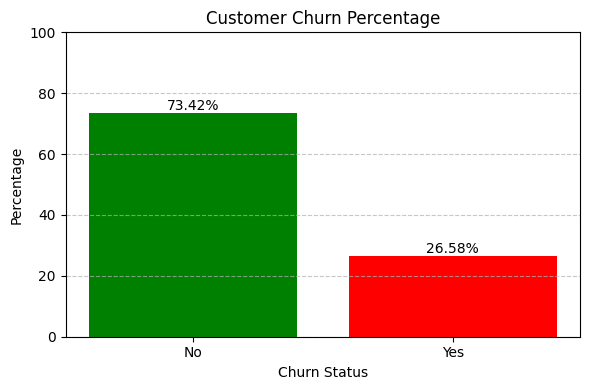

In [16]:
# Calculate churn percentage
churn_percent = df['Churn'].value_counts(normalize=True) * 100

# Plot bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(churn_percent.index, churn_percent.values, color=['green', 'red'])

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.2f}%', ha='center', fontsize=10)

# Chart formatting
plt.title('Customer Churn Percentage')
plt.xlabel('Churn Status')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

10. Create the bins for tenure

In [18]:
df_copy_data['tenure'].max()
#Max value is 72 we will create the bins of 12 months each

np.int64(72)

In [19]:
# Define bins (edges) and labels
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0–12', '13–24', '25–36', '37–48', '49–60', '61–72']

# Create the tenure_bin column
df_copy_data['tenure_bin'] = pd.cut(df_copy_data['tenure'], bins=bins, labels=labels, right=True, include_lowest=True)
df_copy_data['tenure_bin'].value_counts()

df_copy_data.drop(columns='tenure', inplace=True)

11. Change the datatype of Tenure group from category to object

In [20]:
df_copy_data['tenure_bin'] = df_copy_data['tenure_bin'].astype('object')

12. Distribution of customers by Tenure Bins

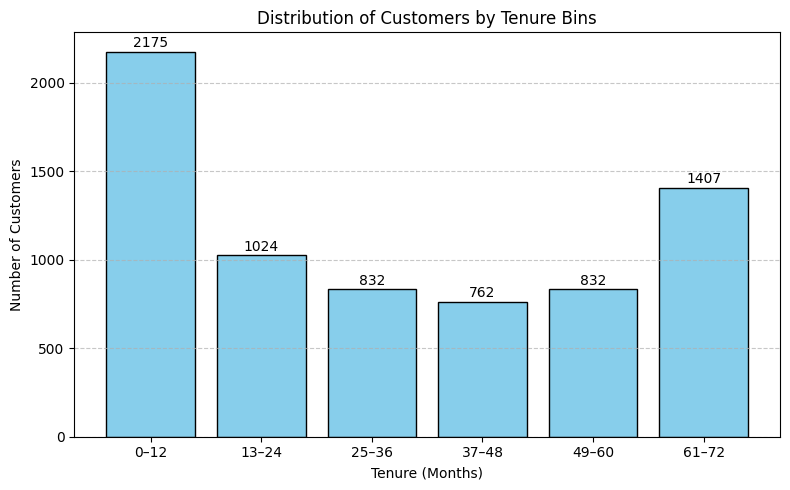

In [22]:
bin_counts = df_copy_data['tenure_bin'].value_counts().sort_index()

# Plot histogram as a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(bin_counts.index.astype(str), bin_counts.values, color='skyblue', edgecolor='black')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom', fontsize=10)

# Chart labels and title
plt.title('Distribution of Customers by Tenure Bins')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Data Exploration

13. Univariate Analysis

Univariate Analysis on categorical feature with respect to Churn we will not include customerId and Churn column also as we are doing the univariate analysis with respect to churn

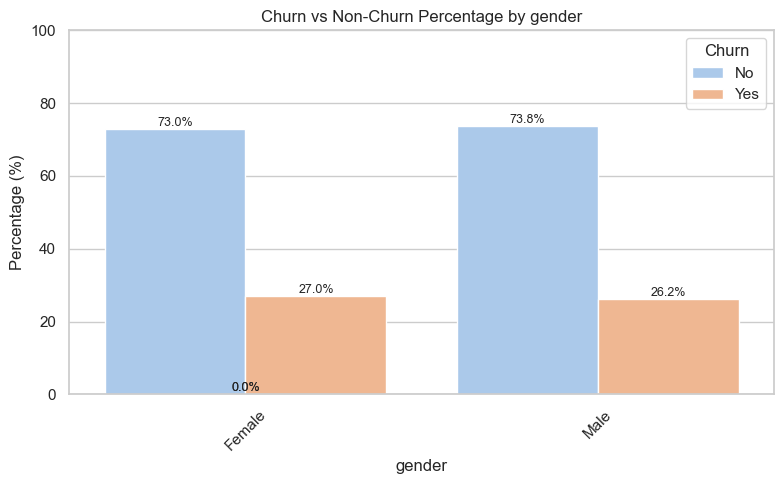

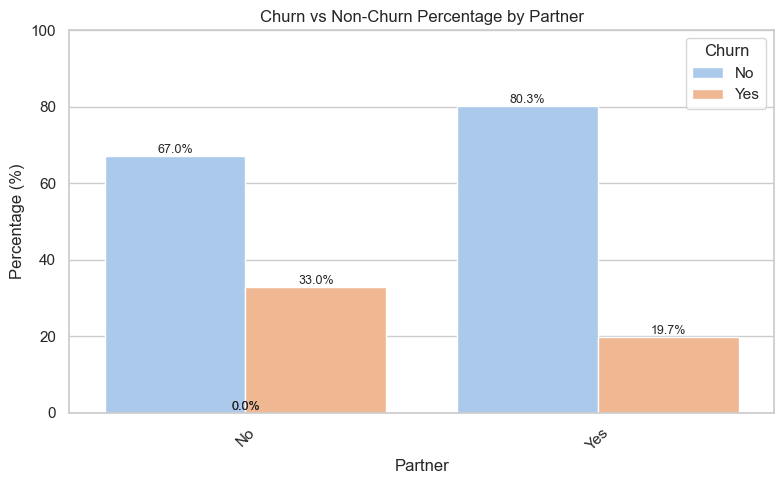

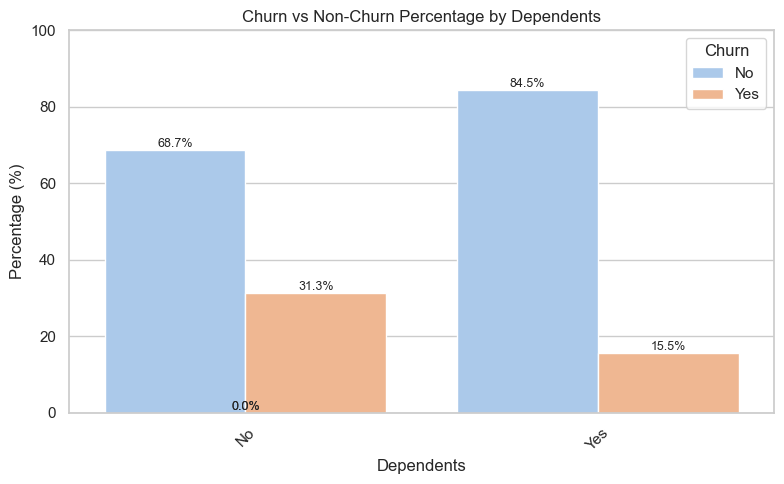

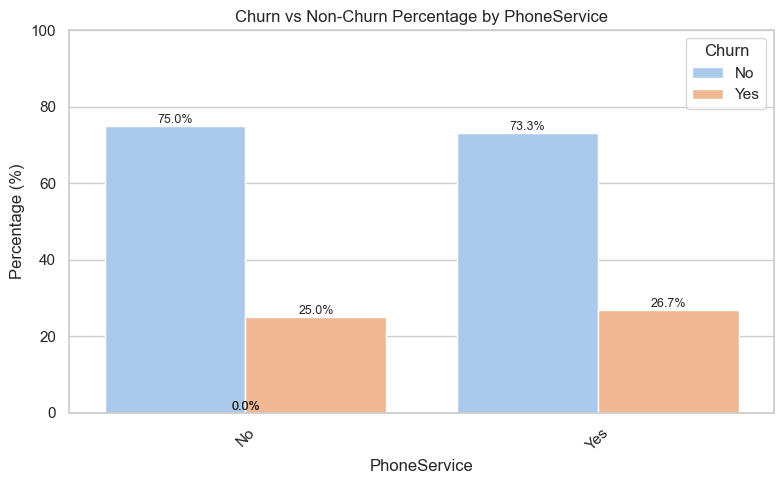

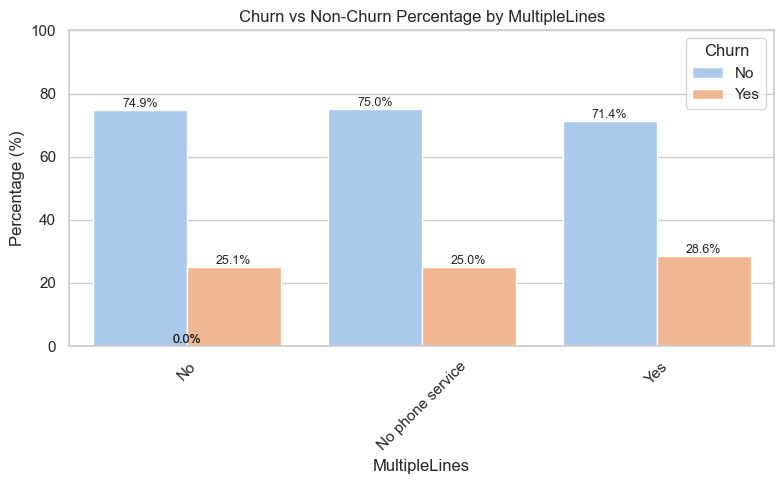

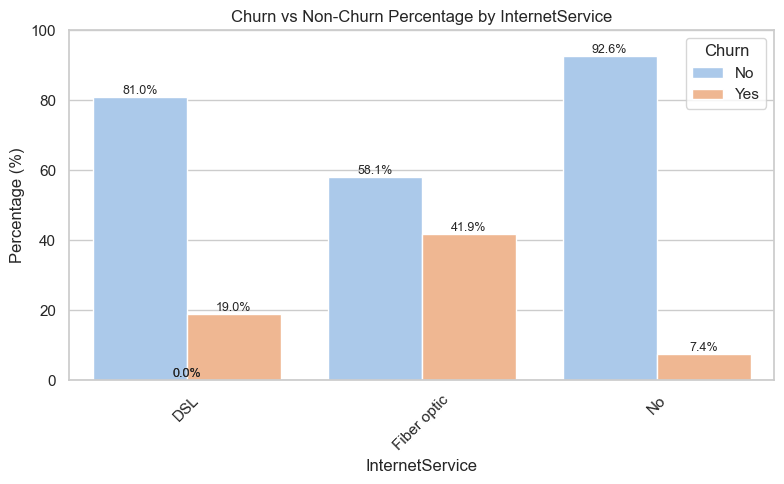

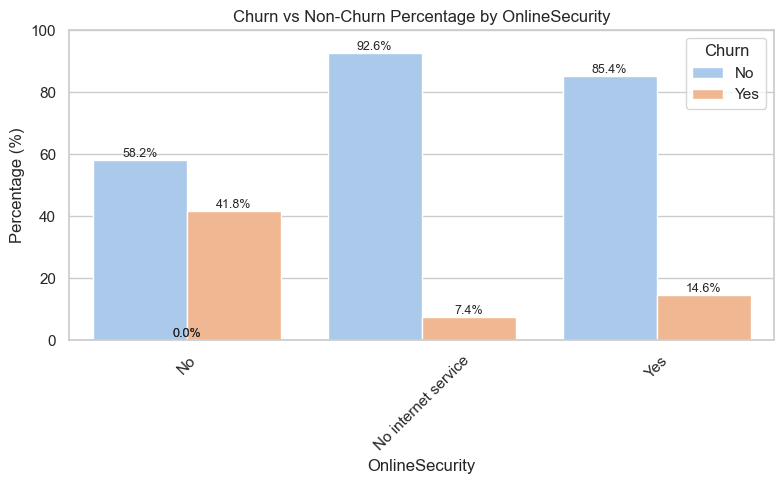

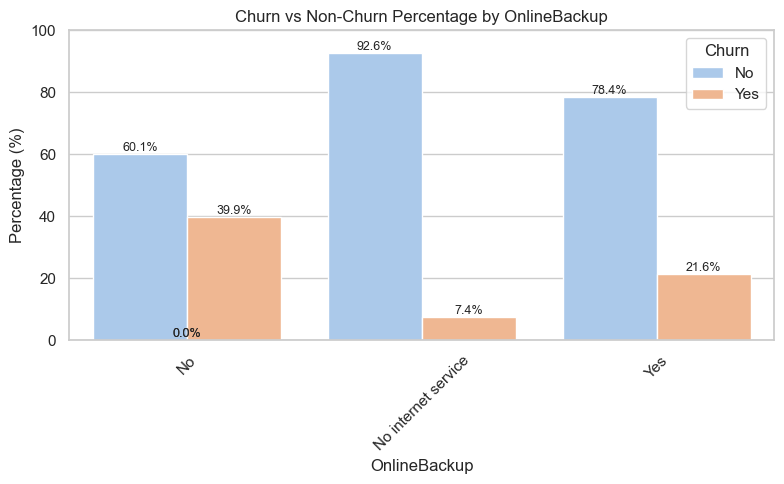

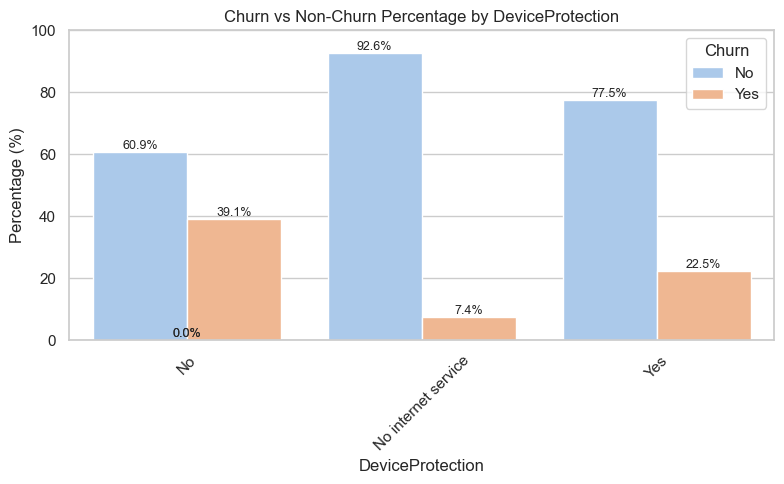

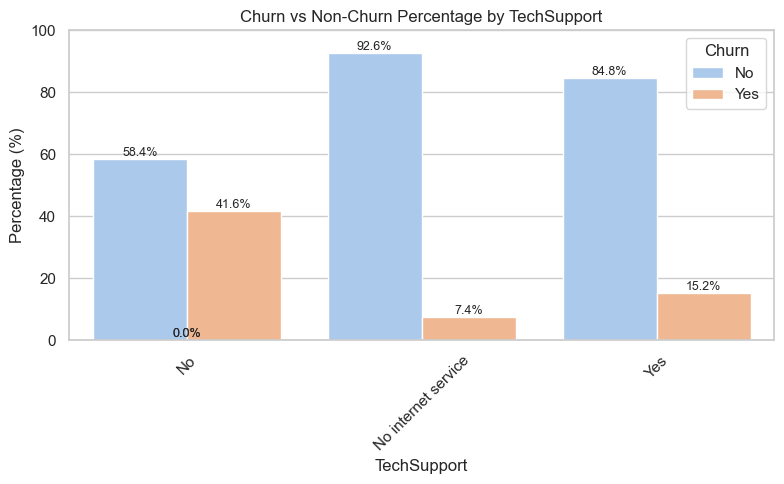

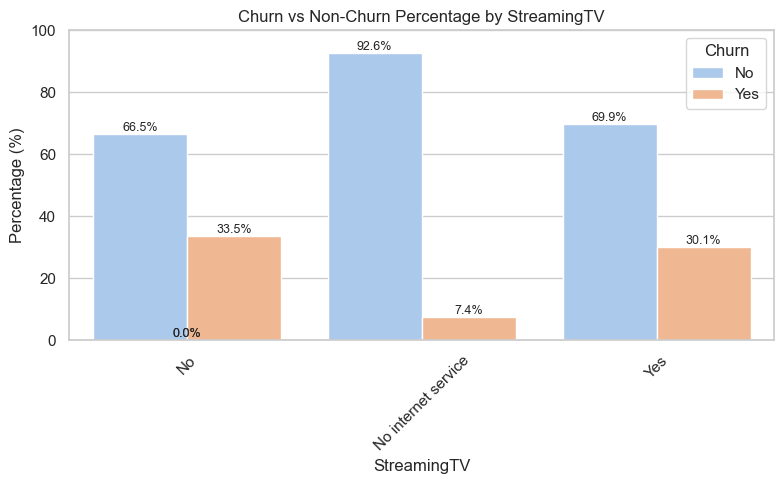

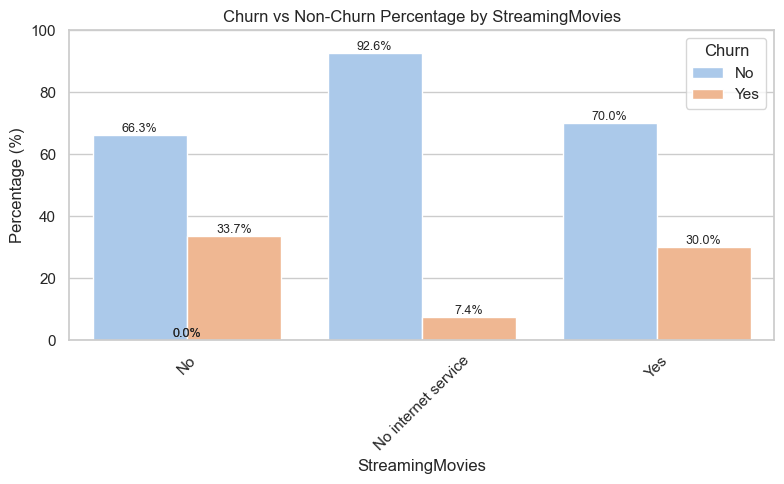

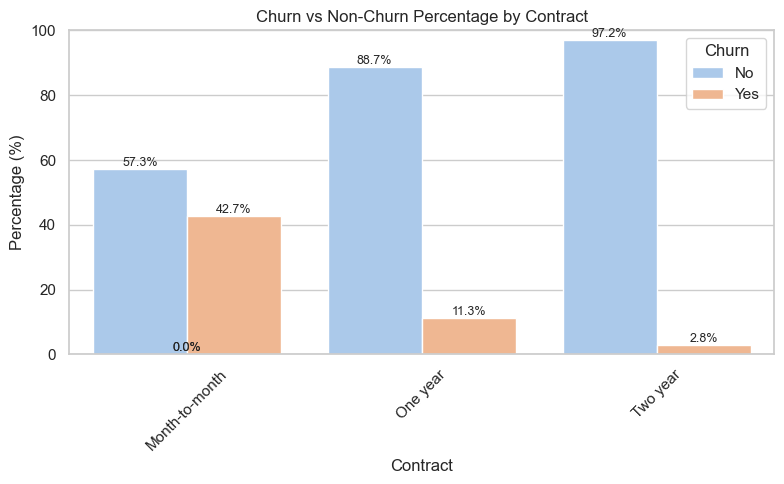

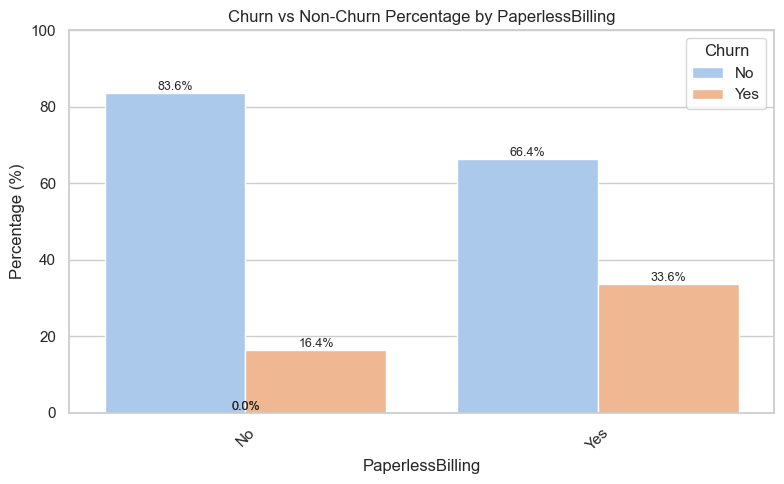

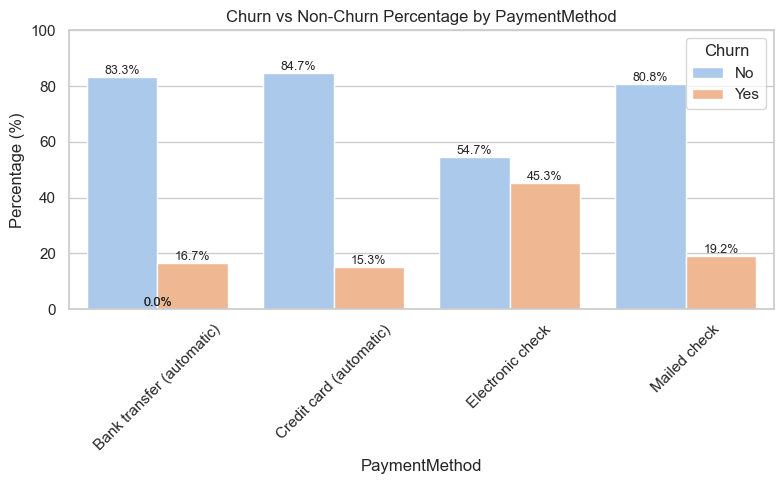

In [118]:
sns.set(style="whitegrid")

# Get all object columns, remove 'customerID' and 'Churn'
cat_features = df_copy_data.select_dtypes(include='object').columns.drop(['customerID', 'Churn','tenure_bin'])

# Step 2: Loop through each categorical feature
for col in cat_features:
    # Create a normalized cross-tab (percentages)
    churn_pct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    churn_pct = churn_pct.reset_index().melt(id_vars=col, var_name='Churn', value_name='Percentage')

    # Plot side-by-side bars
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x=col, y='Percentage', hue='Churn', data=churn_pct, palette='pastel')

    # Add percentage labels
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

    # Customize chart
    plt.title(f'Churn vs Non-Churn Percentage by {col}')
    plt.ylabel('Percentage (%)')
    plt.xlabel(col)
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

In [119]:
df_copy_data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bin
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0–12
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25–36


14. Univariate Analysis on Numerical Columns

C:\temp\ipykernel_13168\3888018753.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_copy_data, palette='Set2')


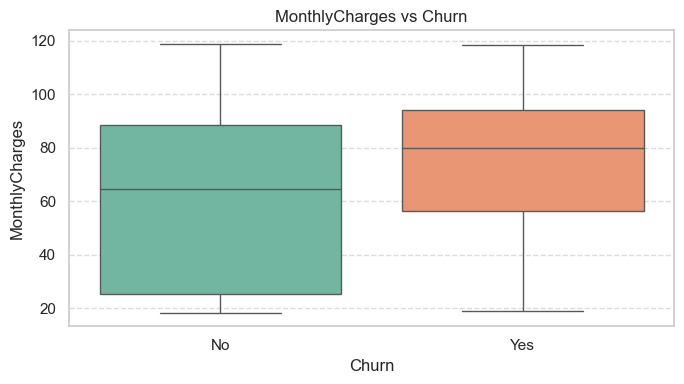

C:\temp\ipykernel_13168\3888018753.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_copy_data, palette='Set2')


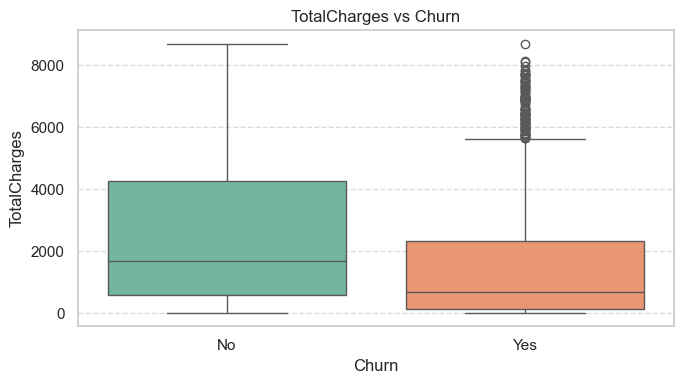

C:\temp\ipykernel_13168\3888018753.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_copy_data, palette='Set2')


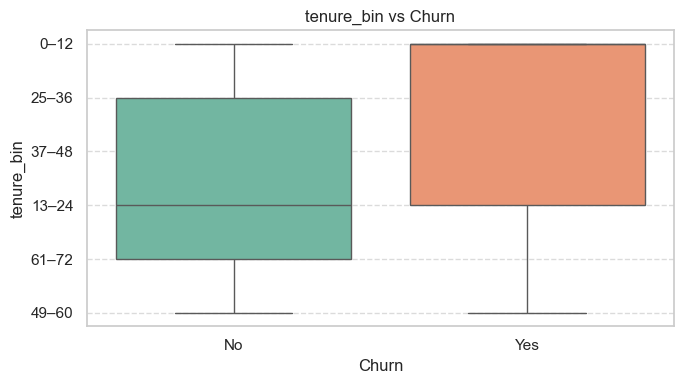

In [120]:
sns.set(style="whitegrid")

# Features to analyze
num_cols = ['MonthlyCharges', 'TotalCharges','tenure_bin']

for col in num_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='Churn', y=col, data=df_copy_data, palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

15. Converting target variable Churn into binary numeric variable i.e. "Yes"=1 and "No"=0

In [29]:
df_copy_data['Churn']=np.where(df_copy_data.Churn=='Yes',1,0)

In [33]:
df_copy_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bin
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0–12
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25–36
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0–12
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37–48
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0–12


16. Remove the columns that do not affect the churn

In [123]:
df_copy_data.drop(columns='customerID',inplace=True)

17. One hot Encoding

#Coverting all categorical variables to dummy variables

In [27]:
df_copy_data_dummies=pd.get_dummies(df_copy_data)
df_copy_data_dummies.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bin_0–12,tenure_bin_13–24,tenure_bin_25–36,tenure_bin_37–48,tenure_bin_49–60,tenure_bin_61–72
0,0,29.85,29.85,0,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [28]:
bool_cols = df_copy_data_dummies.select_dtypes(include='bool').columns
df_copy_data_dummies[bool_cols]=df_copy_data_dummies[bool_cols].astype(int)
df_copy_data_dummies.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bin_0–12,tenure_bin_13–24,tenure_bin_25–36,tenure_bin_37–48,tenure_bin_49–60,tenure_bin_61–72
0,0,29.85,29.85,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


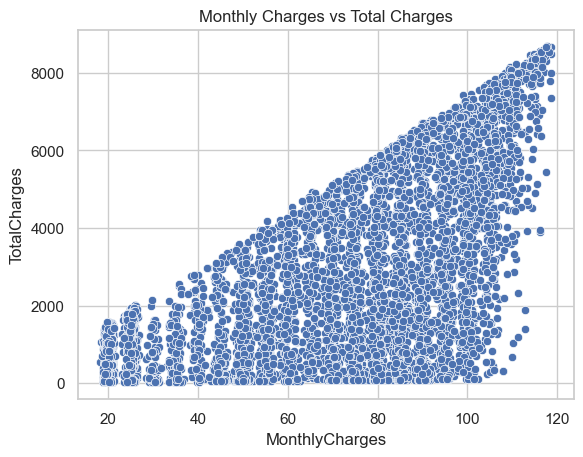

In [126]:
sns.scatterplot(data=df_copy_data_dummies, x='MonthlyCharges', y='TotalCharges')
plt.title('Monthly Charges vs Total Charges')
plt.show()

Analysis :Total Charges increases as monthly charges increases. Monthly charges and total charges are highly co-related.

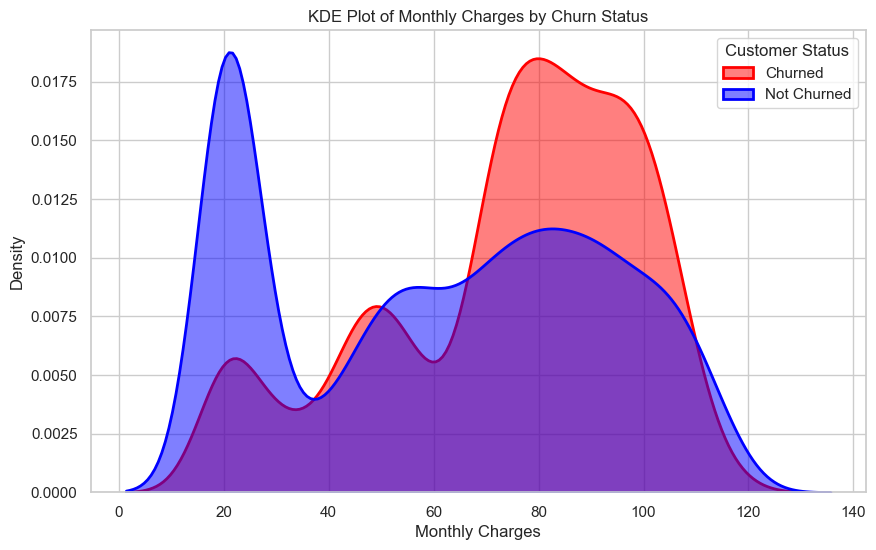

In [127]:
plt.figure(figsize=(10, 6))

# KDE for Churned Customers (Red)
sns.kdeplot(
    data=df_copy_data_dummies[df_copy_data_dummies['Churn'] == 1],
    x='MonthlyCharges',
    label='Churned',
    fill=True,
    color='red',
    alpha=0.5,
    linewidth=2
)

# KDE for Non-Churned Customers (Blue)
sns.kdeplot(
    data=df_copy_data_dummies[df_copy_data_dummies['Churn'] != 1],
    x='MonthlyCharges',
    label='Not Churned',
    fill=True,
    color='blue',
    alpha=0.5,
    linewidth=2
)

# Labels and titles
plt.title('KDE Plot of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend(title='Customer Status')
plt.grid(True)
plt.show()

Analysis  :High monthly charges results in high customer churn.

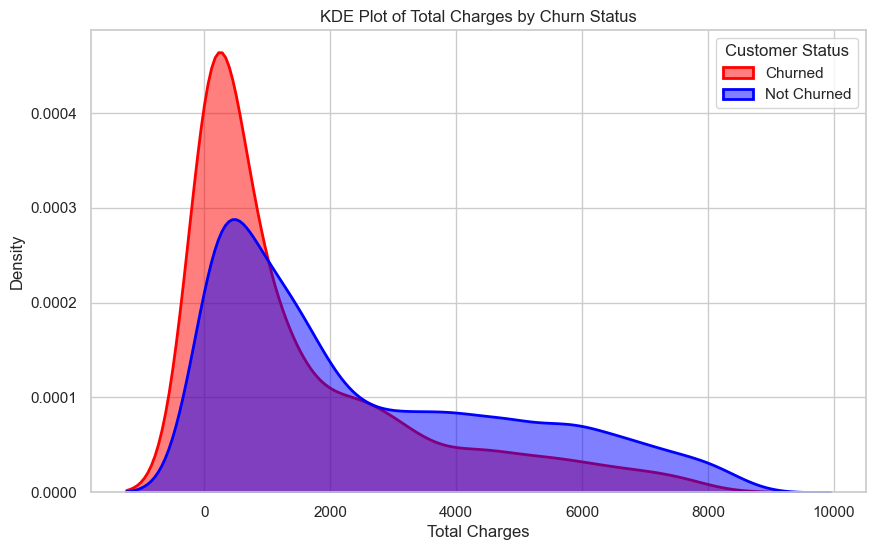

In [128]:
plt.figure(figsize=(10, 6))

# KDE for Churned Customers (Red)
sns.kdeplot(
    data=df_copy_data_dummies[df_copy_data_dummies['Churn'] == 1],
    x='TotalCharges',
    label='Churned',
    fill=True,
    color='red',
    alpha=0.5,
    linewidth=2
)

# KDE for Non-Churned Customers (Blue)
sns.kdeplot(
    data=df_copy_data_dummies[df_copy_data_dummies['Churn'] != 1],
    x='TotalCharges',
    label='Not Churned',
    fill=True,
    color='blue',
    alpha=0.5,
    linewidth=2
)

# Labels and titles
plt.title('KDE Plot of Total Charges by Churn Status')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.legend(title='Customer Status')
plt.grid(True)
plt.show()

Analysis:

**Surpring Insight: Higher Churn at lower Prize, And Low churn at higher price.
However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

18. Correlation of features with respect to Churn

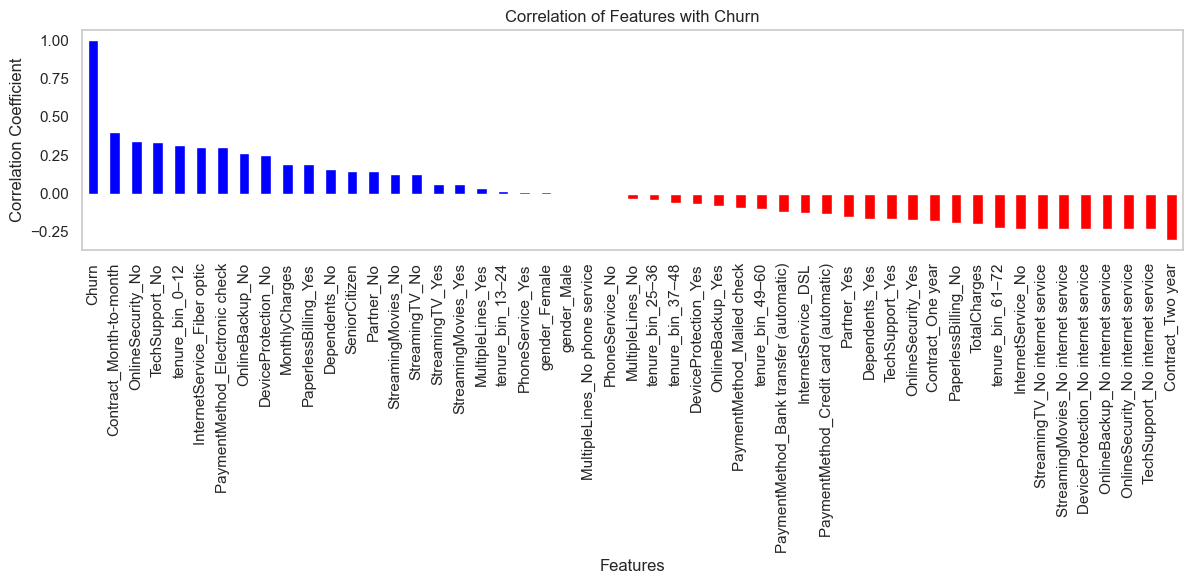

In [129]:
correlation_with_churn = df_copy_data_dummies.corr()['Churn'].sort_values(ascending=False)
# Set bar colors: blue if positive, red if negative
colors = ['blue' if val > 0 else 'red' for val in correlation_with_churn]

# Plot
plt.figure(figsize=(12, 6))
correlation_with_churn.plot(kind='bar', color=colors)
plt.title('Correlation of Features with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.grid(False)  # Disable grid
plt.tight_layout()
plt.show()

**Derived Insight: **

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below

<Axes: >

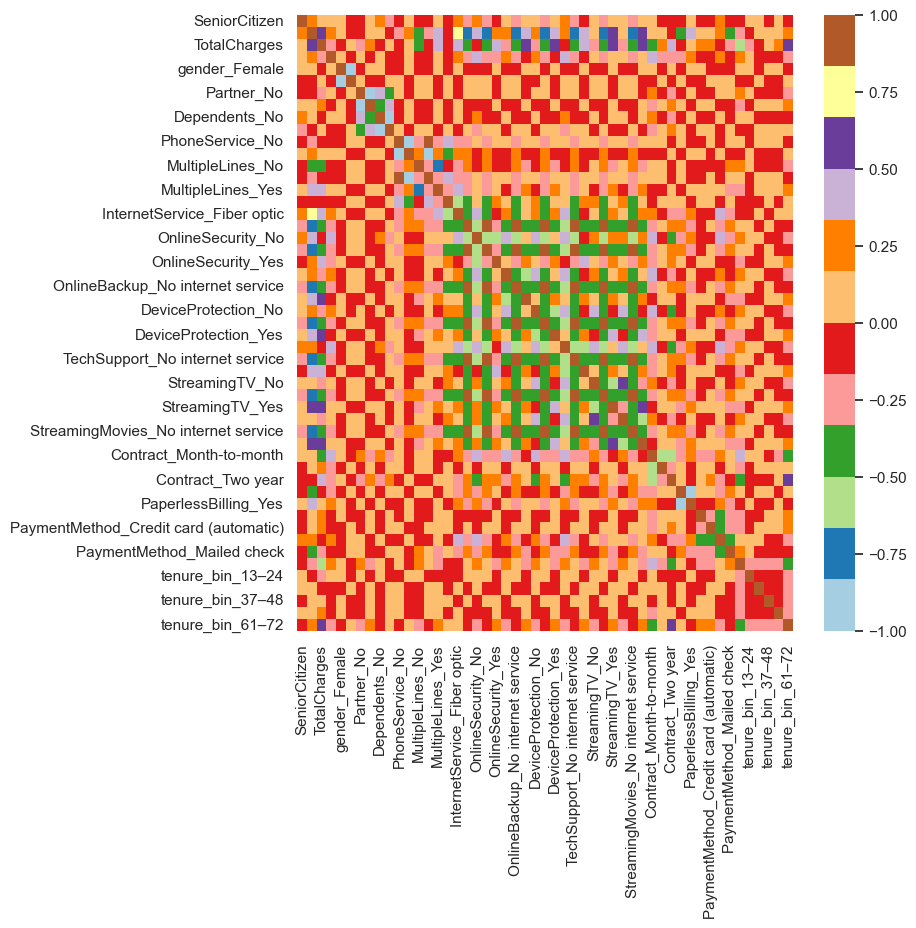

In [130]:
plt.figure(figsize=(8,8))
sns.heatmap(df_copy_data_dummies.corr(), cmap="Paired")

19. Bivariate Analysis with respect to churn

Churn customer by Gender and Partner Status

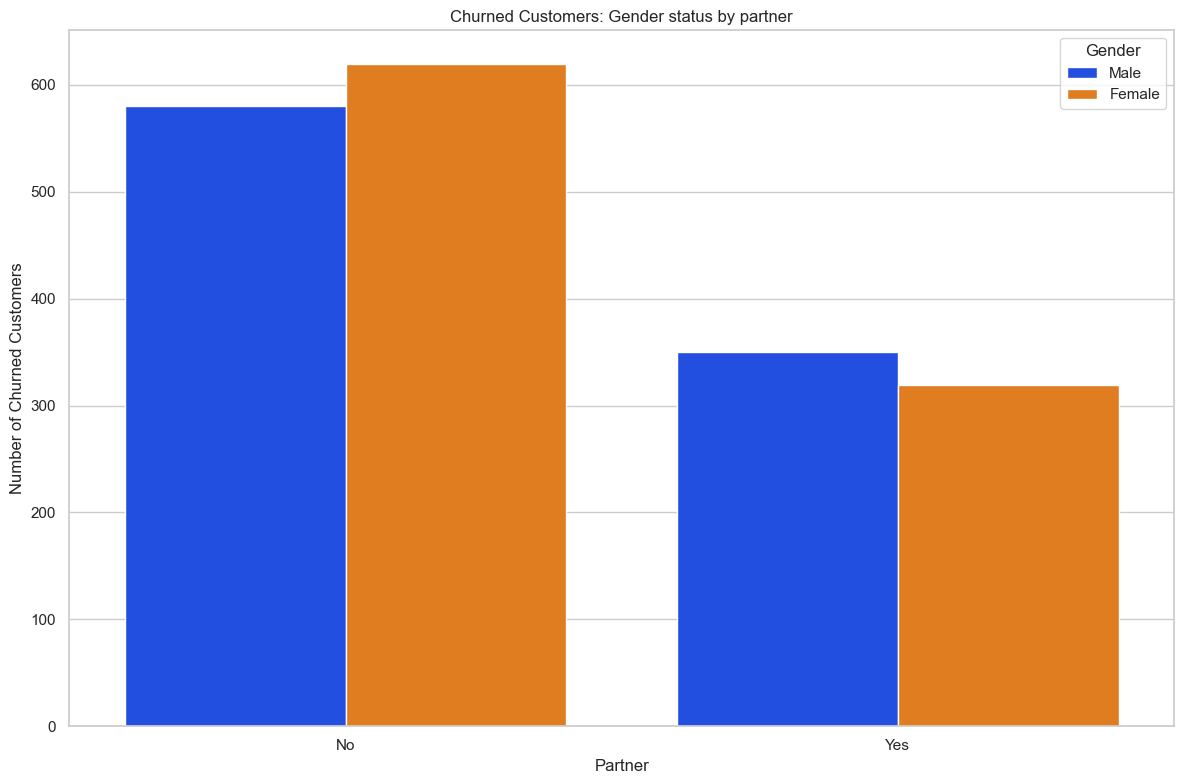

In [131]:
df_churned = df_copy_data[df_copy_data['Churn'] == 1]

# 2. Create a grouped bar chart: Gender on X-axis, hue as Partner status
plt.figure(figsize=(12, 8))
sns.countplot(data=df_churned, x='Partner', hue='gender', palette='bright')

# 3. Add titles and labels
plt.title('Churned Customers: Gender status by partner')
plt.xlabel('Partner')
plt.ylabel('Number of Churned Customers')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

#Function for bivariate analysis with respect to Churn. You just deed to change the arguments.

In [132]:
def uniplot(df,col,title,hue =None):

    plt.figure(figsize=(12, 8))
    sns.countplot(data=df, x=col, hue=hue, palette='bright')

# 3. Add titles and labels
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Number of Churned Customers')
    if hue:
        plt.legend(title=hue)
    plt.tight_layout()
    plt.show()

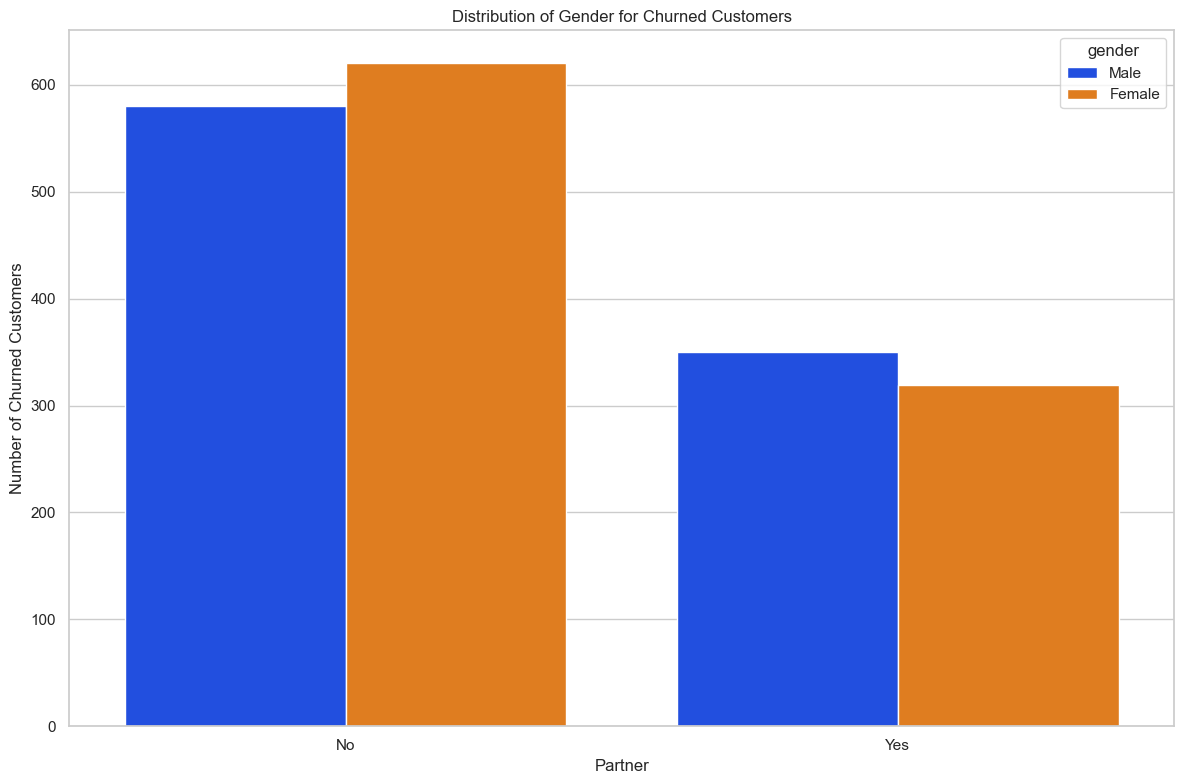

In [133]:
uniplot(df_churned,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

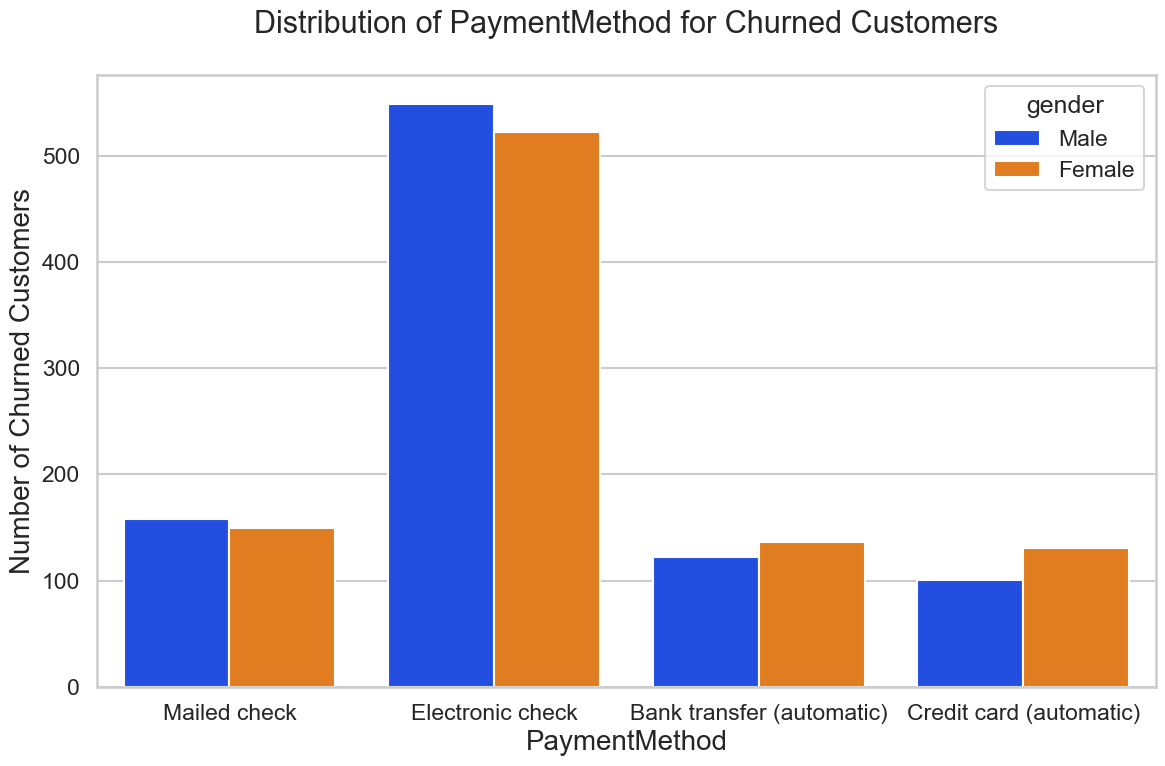

In [64]:
uniplot(df_churned,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

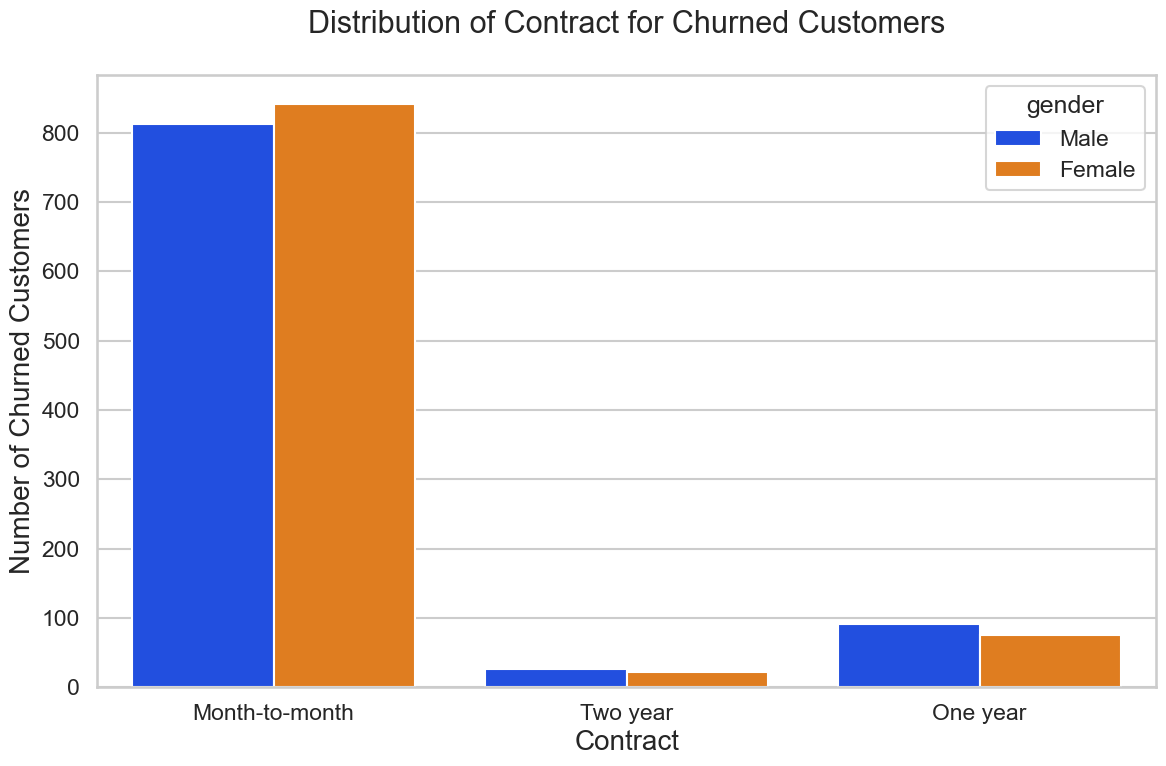

In [65]:
uniplot(df_churned,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

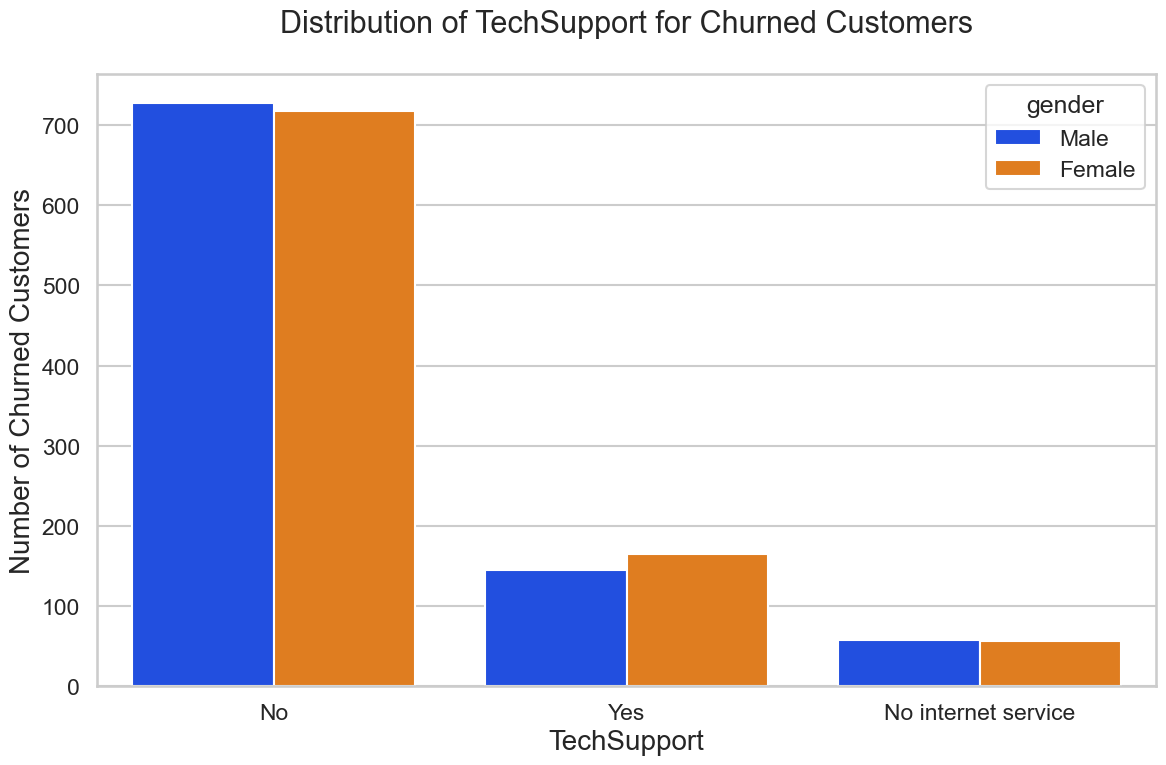

In [66]:
uniplot(df_churned,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

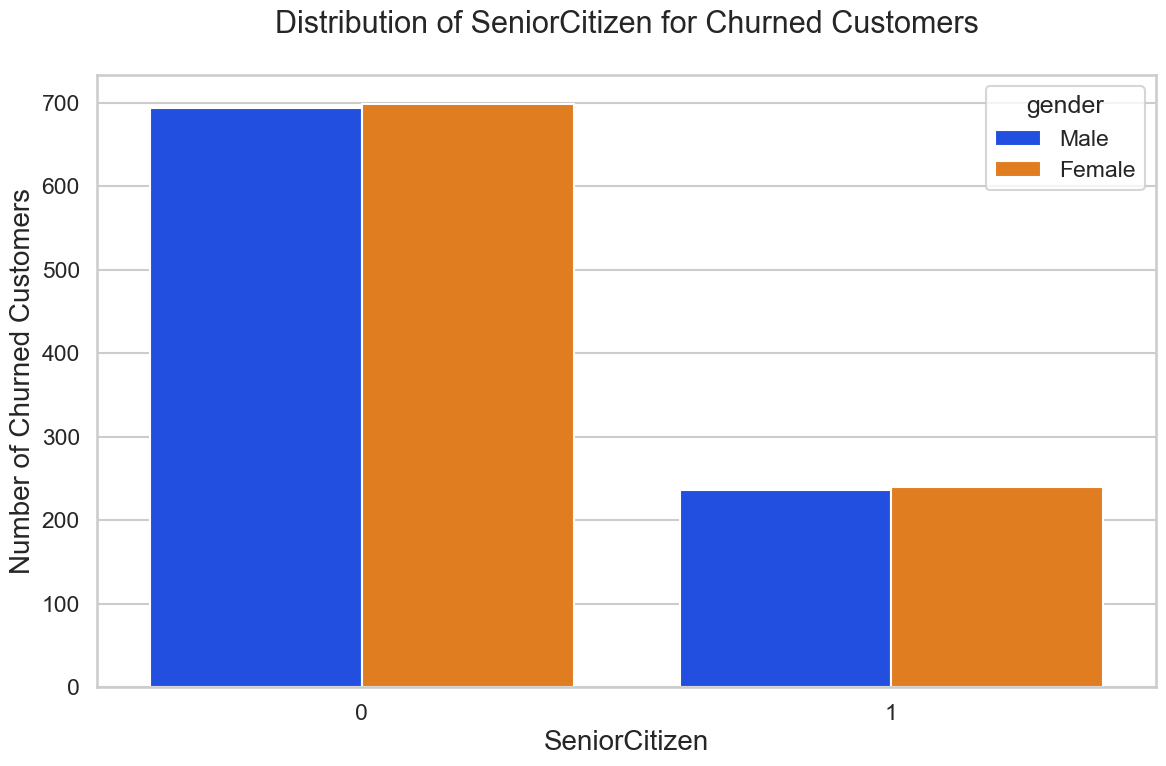

In [67]:
uniplot(df_churned,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

# CONCLUSION

These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners


#Converting dataframe to csv for model building

In [134]:
df_copy_data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   int64  
 5   gender_Male                              7032 non-null   int64  
 6   Partner_No                               7032 non-null   int64  
 7   Partner_Yes                              7032 non-null   int64  
 8   Dependents_No                            7032 non-null   int64  
 9   Dependents_Yes                           7032 non-null   int64  
 10  PhoneService_No                          7032 non-nul

In [135]:
df_copy_data_dummies.to_csv('telecom_churn_for_model.csv')